In [1]:
import numpy as np
import pandas as pd
import networkx as nx
#borrowed heavily from the networkx library.

### Let's make a graph and get comfy with the framework.

{('A', 'B'): Text(0.07692307692307704, -0.3846153846153846, '4'),
 ('A', 'C'): Text(-0.7307692307692306, -0.2692307692307692, '2'),
 ('B', 'C'): Text(0.1923076923076924, -0.2692307692307692, '1'),
 ('B', 'D'): Text(0.5384615384615384, 0.07692307692307687, '5'),
 ('C', 'D'): Text(-0.2692307692307691, 0.19230769230769224, '8'),
 ('C', 'E'): Text(-0.15384615384615377, -0.03846153846153847, '10'),
 ('D', 'E'): Text(0.1923076923076923, 0.3076923076923076, '2'),
 ('D', 'F'): Text(0.07692307692307694, 0.42307692307692296, '8')}

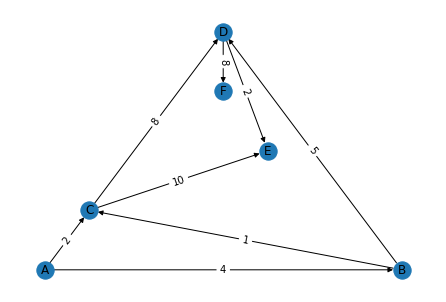

In [74]:
edges = [("A","B", {'weight':4}),
        ("A","C",{'weight':2}),
        ("B","C",{'weight':1}),
        ("B","D", {'weight':5}),
        ("C","D", {'weight':8}),
        ("C","E", {'weight':10}),
        ("D","E",{'weight':2}),
        ("D","F",{'weight':8})
        ]
edge_labels = {("A","B"):4, ("A","C"):2, ("B","C"):1, ("B","D"):5, ("C","D"):8, ("C","E"):10, ("D","E"):2, ("D","F"):8}
   
        
Graph1 = nx.DiGraph()
for i in range(1,7):
    Graph1.add_node(chr(ord('@')+i))
Graph1.add_edges_from(edges)

pos = nx.planar_layout(Graph1)
edge_labels = nx.get_edge_attributes(Graph1,'weight')
nx.draw(Graph1, with_labels = True, pos = pos)

nx.draw_networkx_edge_labels(Graph1,pos,edge_labels=edge_labels)


### Let's make it pretty

In [75]:
from pyvis import network as net 
g1=net.Network(notebook = True)
g1.from_nx(Graph1)
g1.nodes[0]["color"] = "lightgreen"
g1.nodes[0]["title"] = "start"
g1.nodes[5]["color"] = "red"
g1.nodes[5]["title"] = "end"

g1.show("GraphSearch.html")


In [76]:
g1.edges 

##bonus thought: what if I wanted to display edges here? Start thinking!

[{'weight': 4, 'from': 'A', 'to': 'B'},
 {'weight': 2, 'from': 'A', 'to': 'C'},
 {'weight': 1, 'from': 'B', 'to': 'C'},
 {'weight': 5, 'from': 'B', 'to': 'D'},
 {'weight': 8, 'from': 'C', 'to': 'D'},
 {'weight': 10, 'from': 'C', 'to': 'E'},
 {'weight': 2, 'from': 'D', 'to': 'E'},
 {'weight': 8, 'from': 'D', 'to': 'F'}]

In [77]:
nx.shortest_path(Graph1, source="A", weight='weight')

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'B', 'D'],
 'E': ['A', 'B', 'D', 'E'],
 'F': ['A', 'B', 'D', 'F']}

## Let's do some Graph theory! Finally!

## BFS/DFS

In [67]:
print(list(nx.bfs_tree(Graph1, source="A"))) #this graph not very useful to illustrate BFS/DFS. 

['A', 'B', 'C', 'D', 'E', 'F']


In [ ]:
#Lets make a better tree

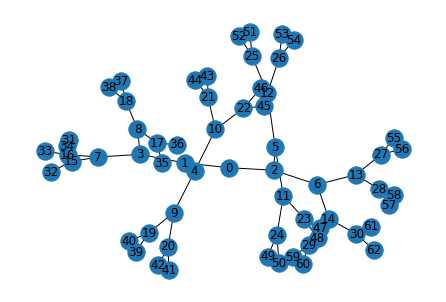

In [23]:
balanced_tree = nx.generators.balanced_tree(2, 5)
nx.draw(balanced_tree, with_labels = True)
g=net.Network(notebook = True)
g.from_nx(balanced_tree)

#Play around with an n-ary tree!

In [24]:
g.show("GraphSearch.html")

In [25]:
#yikes! Not helpfu! 
# let's use this nifty solution here:
#
#https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

In [68]:
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

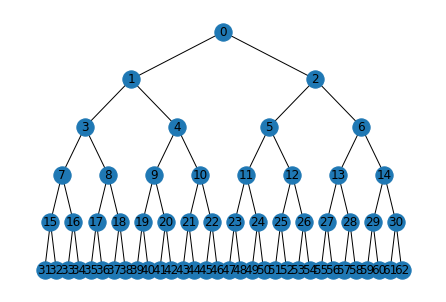

In [70]:
pos = hierarchy_pos(balanced_tree,0)    
nx.draw(balanced_tree, pos=pos, with_labels=True)

## BFS & DFS Part Deux

In [27]:
#Let's do the BFS nodes
print(list(nx.bfs_tree(balanced_tree, source=0)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]


In [28]:
#Let's do the BFS edges
print(list(nx.bfs_tree(balanced_tree, source=0).edges()))

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14), (7, 15), (7, 16), (8, 17), (8, 18), (9, 19), (9, 20), (10, 21), (10, 22), (11, 23), (11, 24), (12, 25), (12, 26), (13, 27), (13, 28), (14, 29), (14, 30), (15, 31), (15, 32), (16, 33), (16, 34), (17, 35), (17, 36), (18, 37), (18, 38), (19, 39), (19, 40), (20, 41), (20, 42), (21, 43), (21, 44), (22, 45), (22, 46), (23, 47), (23, 48), (24, 49), (24, 50), (25, 51), (25, 52), (26, 53), (26, 54), (27, 55), (27, 56), (28, 57), (28, 58), (29, 59), (29, 60), (30, 61), (30, 62)]


In [29]:
#Let's do the DFS nodes
print(list(nx.dfs_tree(balanced_tree, source=0)))

[0, 1, 3, 7, 15, 31, 32, 16, 33, 34, 8, 17, 35, 36, 18, 37, 38, 4, 9, 19, 39, 40, 20, 41, 42, 10, 21, 43, 44, 22, 45, 46, 2, 5, 11, 23, 47, 48, 24, 49, 50, 12, 25, 51, 52, 26, 53, 54, 6, 13, 27, 55, 56, 28, 57, 58, 14, 29, 59, 60, 30, 61, 62]


In [30]:
#Let's do the DFS edges
print(list(nx.dfs_edges(balanced_tree, source=0)))

[(0, 1), (1, 3), (3, 7), (7, 15), (15, 31), (15, 32), (7, 16), (16, 33), (16, 34), (3, 8), (8, 17), (17, 35), (17, 36), (8, 18), (18, 37), (18, 38), (1, 4), (4, 9), (9, 19), (19, 39), (19, 40), (9, 20), (20, 41), (20, 42), (4, 10), (10, 21), (21, 43), (21, 44), (10, 22), (22, 45), (22, 46), (0, 2), (2, 5), (5, 11), (11, 23), (23, 47), (23, 48), (11, 24), (24, 49), (24, 50), (5, 12), (12, 25), (25, 51), (25, 52), (12, 26), (26, 53), (26, 54), (2, 6), (6, 13), (13, 27), (27, 55), (27, 56), (13, 28), (28, 57), (28, 58), (6, 14), (14, 29), (29, 59), (29, 60), (14, 30), (30, 61), (30, 62)]


### Let's make a good graph for Djikstra & A*

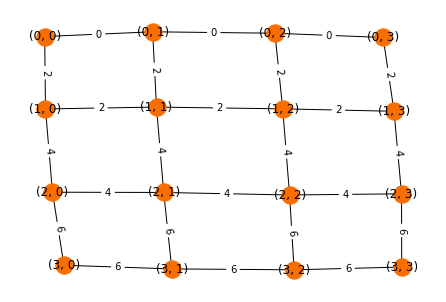

In [46]:
import matplotlib.pyplot as plt 
DA = nx.grid_graph(dim=[4, 4])  # nodes are two-tuples (x,y)
nx.set_edge_attributes(DA, {e: e[1][0] * 2 for e in DA.edges()}, "cost")
pos = nx.spring_layout(DA)
nx.draw(DA, pos, with_labels = True, node_color="#f86e00")
edge_labels = nx.get_edge_attributes(DA, "cost")
nx.draw_networkx_edge_labels(DA, pos, edge_labels=edge_labels)
plt.show()

##Ignore the weights for now!

In [55]:
for idx, e in enumerate(G.edges()):
    print("idx: " + str(idx) + "- edge: " + str(e))
G.number_of_edges() #Do the SMART thing. DO things the EASY way. 

idx: 0- edge: ((0, 0), (1, 0))
idx: 1- edge: ((0, 0), (0, 1))
idx: 2- edge: ((0, 1), (1, 1))
idx: 3- edge: ((0, 1), (0, 2))
idx: 4- edge: ((0, 2), (1, 2))
idx: 5- edge: ((0, 2), (0, 3))
idx: 6- edge: ((0, 3), (1, 3))
idx: 7- edge: ((1, 0), (2, 0))
idx: 8- edge: ((1, 0), (1, 1))
idx: 9- edge: ((1, 1), (2, 1))
idx: 10- edge: ((1, 1), (1, 2))
idx: 11- edge: ((1, 2), (2, 2))
idx: 12- edge: ((1, 2), (1, 3))
idx: 13- edge: ((1, 3), (2, 3))
idx: 14- edge: ((2, 0), (3, 0))
idx: 15- edge: ((2, 0), (2, 1))
idx: 16- edge: ((2, 1), (3, 1))
idx: 17- edge: ((2, 1), (2, 2))
idx: 18- edge: ((2, 2), (3, 2))
idx: 19- edge: ((2, 2), (2, 3))
idx: 20- edge: ((2, 3), (3, 3))
idx: 21- edge: ((3, 0), (3, 1))
idx: 22- edge: ((3, 1), (3, 2))
idx: 23- edge: ((3, 2), (3, 3))


24

In [43]:
print(list(nx.bfs_tree(DA, source=(0,0)))) ## BFS

[(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (0, 2), (3, 0), (2, 1), (1, 2), (0, 3), (3, 1), (2, 2), (1, 3), (3, 2), (2, 3), (3, 3)]


In [45]:
print(list(nx.dfs_tree(DA, source=(0,0)))) ##DFS

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (2, 3), (1, 3), (0, 3)]


## Djikstra's (greedy? (kinda). UCS (kinda). Awesome? Yes!)

In [71]:
p1 = nx.shortest_path(DA, source=(0,0), weight='weight')
p1

{(0, 0): [(0, 0)],
 (1, 0): [(0, 0), (1, 0)],
 (0, 1): [(0, 0), (0, 1)],
 (2, 0): [(0, 0), (1, 0), (2, 0)],
 (1, 1): [(0, 0), (1, 0), (1, 1)],
 (0, 2): [(0, 0), (0, 1), (0, 2)],
 (3, 0): [(0, 0), (1, 0), (2, 0), (3, 0)],
 (2, 1): [(0, 0), (1, 0), (2, 0), (2, 1)],
 (1, 2): [(0, 0), (1, 0), (1, 1), (1, 2)],
 (0, 3): [(0, 0), (0, 1), (0, 2), (0, 3)],
 (3, 1): [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1)],
 (2, 2): [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)],
 (1, 3): [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3)],
 (3, 2): [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2)],
 (2, 3): [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)],
 (3, 3): [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]}

### A*


In [58]:
import networkx as nx

def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

path = nx.astar_path(DA, (0, 0), (3, 3), heuristic=dist, weight="cost")
length = nx.astar_path_length(DA, (0, 0), (3, 3), heuristic=dist, weight="cost")
print("Path: " + str(path))
print("Path length: " + str(length))


Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
Path length: 12
